The RetroTide repository comprises of two key packages - `bcs` and `retrotide`. The `bcs` package comprises key PKS domains (e.g. AT, DH, ER, KR) and their corresponding reaction rules, writted as SMARTS templates with RDKit. These domains can then be concatenated together to form modules, which can in turn be concatenated together to form a chimeric type I PKS. Meanwhile, `retrotide` calls upon `bcs` to combinatorially explore the design space of chimeric type I PKSs with the objective of synthesizing a target molecule, or at least, its required carbon scaffold.

The introduction presented here is specifically for `bcs` rather than `retrotide`. Consequently, in building various PKS designs here, we specify the various starter and extender units as well as the domain architectures within a module. When using `retrotide`, however, we only need to provide a target molecule as the input, after which `retrotide` will recursively decide on the optimal choice of starters, extenders, and domain architectures to use in order to automatically design chimeric PKSs that produce molecules which are chemically similar to the specified target.

In [25]:
from retrotide import retrotide, structureDB

In [26]:
import bcs

We can instantiate various type I PKS domains using any of the following domain classes from the `bcs` package: `bcs.AT` (acyltransferase), `bcs.KR` (ketoreductase), `bcs.DH` (dehydratase), `ER` (enoylreductase), and `bcs.TE` (thioesterase). For each module, the ketosynthase and acyl-carrier protein domains are assumed to be implicitly present.

#### Creating a loading module

In order to create a loading module, we only need a `bcs.AT` domain. We also need to specify which `substrate` is being used and if this is module is a loading module or not (by setting `loading = True` or `loading = False`. The full list of starter units that can be used within a loading module can be found in `../bcs/data/starters.smi`. 

Once a `bcs.AT` domain object has been instantiated, we can create a loading module by passing this `bcs.AT` domain as an argument into the `bcs.Module` class to instantiate an object of the `bcs.Module` class.

In [27]:
### Build a loading module with acetyl-CoA
AT_domain_with_aceyl_coa = bcs.AT(active = True, substrate = "Acetyl-CoA")
loading_module = bcs.Module(domains = {bcs.AT: AT_domain_with_aceyl_coa}, loading = True)

With this loading module, we can now instantiate an object of the `bcs.Cluster` class. The `bcs.Cluster` class takes in a list of modules as its input so while we are only building a PKS with a loading module here, we will add more extension modules later on and these can also be passed in within the input list of modules to build bigger and bigger PKSs.

In [28]:
cluster = bcs.Cluster(modules = [loading_module])

Finally, we can visualize the product from this PKS cluster with a loading module that loads Acetyl-CoA as its starter unit by calling on the `.computeProduct` method for the `bcs.Cluster` class. This `.computeProduct` returns an RDKit `Chem.rdchem.Mol` object.

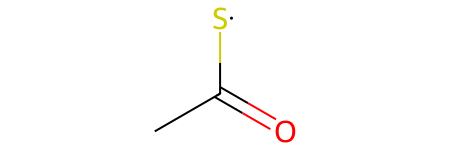

In [29]:
mol = cluster.computeProduct(structureDB)
mol

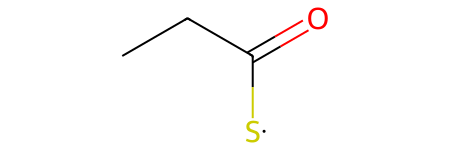

In [30]:
### Build a loading module with propionyl-CoA
AT_domain_with_aceyl_coa = bcs.AT(active = True, substrate = "prop")
loading_module = bcs.Module(domains = {bcs.AT: AT_domain_with_aceyl_coa}, loading = True)
cluster = bcs.Cluster(modules = [loading_module])
mol = cluster.computeProduct(structureDB)
mol

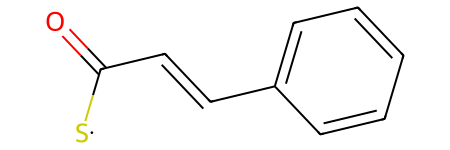

In [31]:
### Build a loading module with cinnamoyl-CoA
AT_domain_with_aceyl_coa = bcs.AT(active = True, substrate = "cin")
loading_module = bcs.Module(domains = {bcs.AT: AT_domain_with_aceyl_coa}, loading = True)
cluster = bcs.Cluster(modules = [loading_module])
mol = cluster.computeProduct(structureDB)
mol

Notice that for the products of each of the loading modules above, there is a sulfur radical attached to the carbonyl carbon atom that is carrying a ketone group. This sulfur radical represents the bond to the acyl-carrier protein in each module. The `bcs` package also has termination domains that we can run to offload the attached substrate to a free-standing molecule, as we will see later.

#### Adding the first extension module to a loading module

Now that we have explored how to build various types of loading module with the full suite of starter units available, let's add extension modules onto these loading modules to ultimately build the elongated carbon scaffolds that type I PKSs are so well known for.

We begin by defining a loading module that uses Acetyl-CoA as the starting unit:

In [33]:
AT_domain_with_aceyl_coa = bcs.AT(active = True, substrate = "Acetyl-CoA")
loading_module = bcs.Module(domains = {bcs.AT: AT_domain_with_aceyl_coa}, loading = True)

To add the first extension module onto this loading module, let's use malonyl-CoA as an extension unit. Malonyl-CoA will add two carbons onto the previously loaded acetyl-CoA and we can ultimately expect the final product to exhibit a four carbon backbone. For the domain architecture, let's begin with just KS-AT-ACP, i.e. ketosynthase - acyltransferase - acyl-carrier protein. Since the KS and ACP domains are implicitly featurized in `bcs`, we only need to specify the AT domain for the first extension module:

In [43]:
### Create Module 1 with just a ketoreductase
AT_domain_mod1 = bcs.AT(active = True, substrate = "Malonyl-CoA") # Malonyl-CoA is used as an extension unit
module1 = bcs.Module(domains = {bcs.AT: AT_domain_mod1}, loading = False)

Now, when creating an object of the `bcs.Cluster` class, we pass the list of modules `[loading_module, module1]`) as an argument and then call upon `structureDB` to ultimately visualize the PKS product:

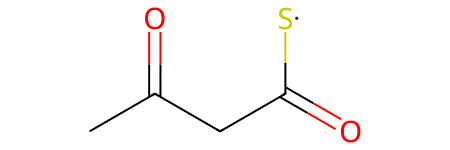

In [44]:
cluster = bcs.Cluster(modules = [loading_module, module1])
cluster.computeProduct(structureDB)

This product now comprises 4 carbon atoms, as anticipated, and neither carbonyl carbon has been reduced since the first extension module did not contain any additional domain types, such as a ketoreductase (KR), dehydratase (DH), or enoylreductase (ER) domain. To understand the effect of each of these additional domain types, let's gradually incorporate them into the first extension module:

Since malonyl-CoA added a ketone group to the previously loaded acetly-CoA substrate, the first domain type that can be included within the first extension module would naturally be a ketoreductase (KR). KR domains can be of many types: `B1`, `B`, `C1`, `A1`, `A2`, `A`, `B1`, `B2`, `B`, `C1`, `C2`, and `U`. Each of these KR domain types largely work the same way but only result in slightly different stereochemistries when the ketone group that they act on is transformed into an alcohol group. If we care only about the 2D structure of a PKS product, then the KR domain type used doesn't really matter.

In [46]:
### Create a loading module with acetyl-CoA
AT_domain_with_aceyl_coa = bcs.AT(active = True, substrate = "Acetyl-CoA")
loading_module = bcs.Module(domains = {bcs.AT: AT_domain_with_aceyl_coa}, loading = True)

### Create an extension module with malonyl-CoA and a KR domain
AT_domain_mod1 = bcs.AT(active = True, substrate = "Malonyl-CoA") # Malonyl-CoA is used as an extension unit
KR_domain_mod1 = bcs.KR(active = True, type = "B")
module1 = bcs.Module(domains = {bcs.AT: AT_domain_mod1,
                                bcs.KR: KR_domain_mod1}, loading = False)

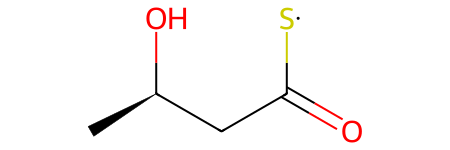

In [47]:
cluster = bcs.Cluster(modules = [loading_module, module1])
cluster.computeProduct(structureDB)

Now that our first extension module already comprises a KS-AT-KR-ACP domain architecture, let's expand this to KS-AT-KR-DH-ACP and observe what the resulting product would look like. The dehydratase (DH) domain will perform an elimination reaction and create an alkene bond so we should expect to see an alkene in the final PKS product. Depending on the stereochemistry of the alcohol group created via the KR domain, the E/Z stereochemistry of the double-bond created by the DH domain is usually affected accordingly but for now, we focus only on the 2D structures:

In [48]:
### Create a loading module with acetyl-CoA
AT_domain_with_aceyl_coa = bcs.AT(active = True, substrate = "Acetyl-CoA")
loading_module = bcs.Module(domains = {bcs.AT: AT_domain_with_aceyl_coa}, loading = True)

### Create an extension module with malonyl-CoA and a KR domain
AT_domain_mod1 = bcs.AT(active = True, substrate = "Malonyl-CoA") # Malonyl-CoA is used as an extension unit
KR_domain_mod1 = bcs.KR(active = True, type = "B")
DH_domain_mod1 = bcs.DH(active = True)
module1 = bcs.Module(domains = {bcs.AT: AT_domain_mod1,
                                bcs.KR: KR_domain_mod1,
                                bcs.DH: DH_domain_mod1}, loading = False)

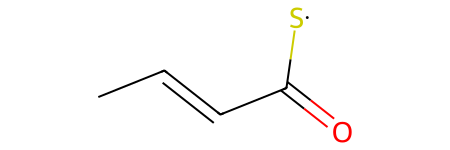

In [49]:
cluster = bcs.Cluster(modules = [loading_module, module1])
cluster.computeProduct(structureDB)